In [1]:
import pandas as pd

In [2]:
#https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#
dataset = pd.read_csv("project/energydata_complete.csv")
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# Summarize the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
dataset.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
import datetime
dataset['month'] = pd.DatetimeIndex(dataset['date']).month
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1


In [6]:
# Remove date
dataset.drop(['date'], axis=1, inplace=True)

In [7]:
dataset.describe(include='all')

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000


In [8]:
# Correlatin matrix (Heatmap)
import seaborn as sns

In [9]:
dataset.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,-0.011606
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,-0.179452
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.706305
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,-0.094048
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.533479
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.097914
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,0.790365
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.414359
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.789168
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.258167


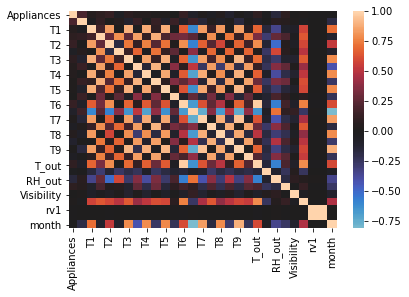

In [10]:
ht = sns.heatmap(dataset.corr(),center=0)

In [11]:
dataset['month'].value_counts()

3    4464
4    4320
2    4176
5    3853
1    2922
Name: month, dtype: int64

In [12]:
dataset.keys()

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'month'],
      dtype='object')

In [13]:
df = dataset.drop(['Appliances', 'lights', 'RH_1', 'RH_2', 'RH_7', 'Press_mm_hg', 'Visibility', 'rv1', 'rv2'], axis=1)

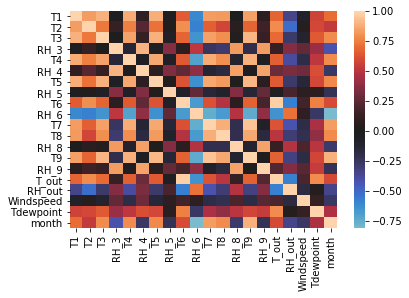

In [14]:
ht = sns.heatmap(df.corr(),center=0)

In [15]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,T1,T2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Tdewpoint,month
T1,1.00,0.84,0.89,-0.03,0.88,0.10,0.89,-0.01,0.65,-0.62,0.84,0.83,-0.01,0.84,0.07,0.68,-0.35,-0.09,0.57,0.71
T2,0.84,1.00,0.74,0.12,0.76,0.23,0.72,0.03,0.80,-0.58,0.66,0.58,0.07,0.68,0.16,0.79,-0.51,0.05,0.58,0.53
T3,0.89,0.74,1.00,-0.01,0.85,0.12,0.89,-0.07,0.69,-0.65,0.85,0.80,0.04,0.90,0.13,0.70,-0.28,-0.10,0.65,0.79
RH_3,-0.03,0.12,-0.01,1.00,-0.14,0.90,-0.05,0.38,0.08,0.51,-0.25,-0.28,0.83,-0.20,0.83,0.12,0.36,0.26,0.41,-0.41
T4,0.88,0.76,0.85,-0.14,1.00,-0.05,0.87,-0.08,0.65,-0.70,0.88,0.80,-0.10,0.89,-0.03,0.66,-0.39,-0.19,0.52,0.79
RH_4,0.10,0.23,0.12,0.90,-0.05,1.00,0.09,0.35,0.26,0.39,-0.13,-0.17,0.85,-0.04,0.86,0.29,0.34,0.30,0.62,-0.26
T5,0.89,0.72,0.89,-0.05,0.87,0.09,1.00,0.03,0.63,-0.63,0.87,0.82,0.02,0.91,0.07,0.65,-0.27,-0.15,0.59,0.79
RH_5,-0.01,0.03,-0.07,0.38,-0.08,0.35,0.03,1.00,-0.08,0.26,-0.14,-0.09,0.36,-0.14,0.27,-0.05,0.19,0.08,0.08,-0.23
T6,0.65,0.80,0.69,0.08,0.65,0.26,0.63,-0.08,1.00,-0.67,0.62,0.48,0.07,0.67,0.18,0.97,-0.57,0.17,0.76,0.60
RH_6,-0.62,-0.58,-0.65,0.51,-0.70,0.39,-0.63,0.26,-0.67,1.00,-0.75,-0.67,0.49,-0.74,0.39,-0.64,0.72,0.10,-0.26,-0.81


In [16]:
data = df.sample(frac=0.2, random_state=1)

In [17]:
df['month'].value_counts()

3    4464
4    4320
2    4176
5    3853
1    2922
Name: month, dtype: int64

In [18]:
data['month'].value_counts()

3    906
2    860
4    821
5    761
1    599
Name: month, dtype: int64

In [19]:
X = data.drop(['month'], axis=1)
y = data['month']

In [20]:
X.head()

,T1,T2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Tdewpoint
343,18.963333,18.290,19.8900,43.200000,18.50,41.790000,17.790000,64.623333,2.260000,93.126667,18.100000,19.29,51.090000,16.700000,46.030000,2.866667,92.333333,5.166667,1.683333
13136,22.600000,20.945,23.2000,40.626667,22.70,42.000000,21.100000,45.900000,11.463333,34.830000,21.890000,23.58,42.290000,20.790000,41.290000,12.466667,69.333333,4.000000,6.866667
19315,24.700000,23.290,25.3900,38.545000,24.29,40.400000,24.290000,71.236000,13.766667,1.066667,23.390000,24.85,41.434000,22.426667,36.933333,12.216667,71.000000,5.833333,7.016667
4706,20.025000,18.100,20.7900,39.678000,18.60,39.723333,18.600000,55.440556,2.433333,88.030000,18.945000,21.70,45.357222,18.600000,43.156667,1.700000,89.333333,2.333333,0.100000
5322,21.000000,19.500,20.2675,35.608750,19.50,33.260000,17.777143,43.884286,4.400000,63.250000,20.426667,22.10,33.663333,18.100000,38.590000,3.000000,73.000000,2.000000,-1.400000


In [21]:
# Do train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [22]:
#1 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [23]:
# Scale for the classification dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [24]:
grid_parameters = {
    'tol':[0.01,0.1,1],
    'random_state':[0,1],
    'solver':['lbfgs','sag'],
    'max_iter':[100,1000]
    }
grid = GridSearchCV(LogisticRegression(),grid_parameters,cv=4)

In [25]:
grid.fit(X_train_scaled,y_train)

F:\Users\Unicorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\Unicorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 1000], 'random_state': [0, 1],
                         'solver': ['lbfgs', 'sag'], 'tol': [0.01, 0.1, 1]})

In [26]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.1}
LogisticRegression(random_state=0, tol=0.1)
0.9049770579647367


In [27]:
# Find the k-fold crossvalidated test_score
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(random_state=0, tol=0.1),X_train,y_train,cv=4,scoring='accuracy').mean()

F:\Users\Unicorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\Users\Unicorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

0.7912579615279716

In [28]:
# Find testing score - accuracy
grid.score(X_test_scaled, y_test)

0.9063291139240506

In [29]:
y_pred = grid.predict(X_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9063291139240506

In [31]:
# Find confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

Confusion matrix :
 [[109   2   0   0   0]
 [  0 172   6   0   0]
 [  0  17 162  17   0]
 [  0   0   6 133  13]
 [  0   0   1  12 140]]

Classification report :
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       111
           2       0.90      0.97      0.93       178
           3       0.93      0.83      0.87       196
           4       0.82      0.88      0.85       152
           5       0.92      0.92      0.92       153

    accuracy                           0.91       790
   macro avg       0.91      0.91      0.91       790
weighted avg       0.91      0.91      0.91       790



Logistic Regression

In [32]:
#2 KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
params_dictionary = {
                        'n_neighbors' : [3, 5, 10],
                        'weights': ['uniform','distance'],
                        'p' : [1, 2, 3],
                        'n_jobs' : [1, -1]
                     }
grid = GridSearchCV(KNeighborsClassifier(),param_grid=params_dictionary,cv=4)

In [34]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [1, -1], 'n_neighbors': [3, 5, 10],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [35]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'n_jobs': 1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(n_jobs=1, n_neighbors=3, p=1, weights='distance')
0.9676890311402031


In [36]:
# Find the k-fold crossvalidated test_score
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(n_jobs=1, n_neighbors=3, p=1, weights='distance'),X_train,y_train,cv=4,scoring='accuracy').mean()

0.9676890311402031

In [37]:
grid.score(X_test, y_test)

0.979746835443038

In [38]:
y_pred = grid.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.979746835443038

In [40]:
# Find confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

Confusion matrix :
 [[111   0   0   0   0]
 [  0 178   0   0   0]
 [  0   0 191   5   0]
 [  0   0   5 146   1]
 [  0   0   0   5 148]]

Classification report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00       178
           3       0.97      0.97      0.97       196
           4       0.94      0.96      0.95       152
           5       0.99      0.97      0.98       153

    accuracy                           0.98       790
   macro avg       0.98      0.98      0.98       790
weighted avg       0.98      0.98      0.98       790



KNN

In [41]:
#3 SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [42]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                        'degree': [2,3],
                    }
grid = GridSearchCV(SVC(),param_grid=params_dictionary,cv=4)

In [43]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [44]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 1, 'degree': 2, 'kernel': 'linear'}
SVC(C=1, degree=2, kernel='linear')
0.9261964351606744


In [45]:
# Find the k-fold crossvalidated test_score
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(C=1, degree=2, kernel='linear'),X_train,y_train,cv=4,scoring='accuracy').mean()

0.9261964351606744

In [46]:
grid.score(X_test,y_test)

0.9379746835443038

In [47]:
y_pred = grid.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9379746835443038

In [49]:
# Find confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred,zero_division=0))

Confusion matrix :
 [[111   0   0   0   0]
 [  0 173   5   0   0]
 [  0   9 174  13   0]
 [  0   0   6 139   7]
 [  0   0   0   9 144]]

Classification report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       111
           2       0.95      0.97      0.96       178
           3       0.94      0.89      0.91       196
           4       0.86      0.91      0.89       152
           5       0.95      0.94      0.95       153

    accuracy                           0.94       790
   macro avg       0.94      0.94      0.94       790
weighted avg       0.94      0.94      0.94       790



SVC

In [50]:
#4 Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
params = {
    'random_state':[0,1],
    'max_depth':[1,5,10],
    'n_estimators':[20,40,60,80,100]}
grid = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=4)

In [52]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [0, 1]})

In [53]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'max_depth': 10, 'n_estimators': 80, 'random_state': 0}
RandomForestClassifier(max_depth=10, n_estimators=80, random_state=0)
0.973073590990037


In [54]:
# Find the k-fold crossvalidated test_score
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(max_depth=10, n_estimators=80, random_state=0),X_train,y_train,cv=4,scoring='accuracy').mean()

0.973073590990037

In [55]:
grid.score(X_test,y_test)

0.9746835443037974

In [56]:
y_pred = grid.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9746835443037974

In [58]:
# Find confusion matrix, classification report
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred,zero_division=0))

Confusion matrix :
 [[111   0   0   0   0]
 [  0 174   4   0   0]
 [  0   0 191   5   0]
 [  0   0   0 152   0]
 [  0   0   3   8 142]]

Classification report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       111
           2       1.00      0.98      0.99       178
           3       0.96      0.97      0.97       196
           4       0.92      1.00      0.96       152
           5       1.00      0.93      0.96       153

    accuracy                           0.97       790
   macro avg       0.98      0.98      0.98       790
weighted avg       0.98      0.97      0.97       790



Random Forest

In [59]:
#5 AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [60]:
params = {
    'random_state':[0,1],
    'base_estimator':[
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=5),
        DecisionTreeClassifier(max_depth=10)
    ],
    'n_estimators':[20,40,60,80,100]}
grid = GridSearchCV(AdaBoostClassifier(),param_grid=params,cv=4)

In [61]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=10)],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [0, 1]})

In [62]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'base_estimator': DecisionTreeClassifier(max_depth=10), 'n_estimators': 80, 'random_state': 0}
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=80, random_state=0)
0.9949318958463685


In [63]:
# Find the k-fold crossvalidated test_score
from sklearn.model_selection import cross_val_score
cross_val_score(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=80, random_state=0),X_train,y_train,cv=4,scoring='accuracy').mean()

0.9949318958463685

In [64]:
grid.score(X_test,y_test)

0.9924050632911392

In [65]:
y_pred = grid.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9924050632911392

In [67]:
# Find classification report - accuracy, precision, recall, f1-score,
#                               macro avg, weighted avg
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred,zero_division=0))

Confusion matrix :
 [[111   0   0   0   0]
 [  0 178   0   0   0]
 [  0   0 192   4   0]
 [  0   0   0 152   0]
 [  0   0   0   2 151]]

Classification report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00       178
           3       1.00      0.98      0.99       196
           4       0.96      1.00      0.98       152
           5       1.00      0.99      0.99       153

    accuracy                           0.99       790
   macro avg       0.99      0.99      0.99       790
weighted avg       0.99      0.99      0.99       790



AdaBoost

In [68]:
Z = X_test[['T9','RH_6']]
import numpy as np
yt = np.array(y_test)

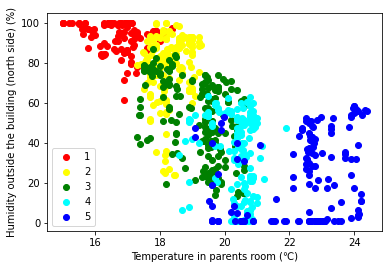

In [69]:
import matplotlib.pyplot as plt
plt.scatter(Z.iloc[yt==1,0],Z.iloc[yt==1,1],c='red')
plt.scatter(Z.iloc[yt==2,0],Z.iloc[yt==2,1],c='yellow')
plt.scatter(Z.iloc[yt==3,0],Z.iloc[yt==3,1],c='green')
plt.scatter(Z.iloc[yt==4,0],Z.iloc[yt==4,1],c='cyan')
plt.scatter(Z.iloc[yt==5,0],Z.iloc[yt==5,1],c='blue')
plt.xlabel('Temperature in parents room (℃)')
plt.ylabel('Humidity outside the building (north side) (%)')
plt.legend([1,2,3,4,5],loc=3)
plt.show()

In [70]:
Z = X_test[['T9','RH_6']]
yp = y_pred

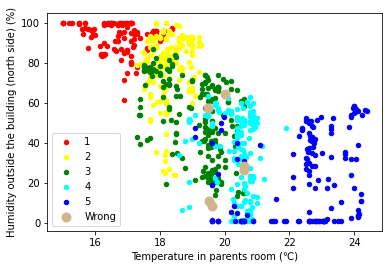

In [71]:
import matplotlib.pyplot as plt
plt.scatter(Z.iloc[yp==1,0],Z.iloc[yp==1,1],c='red',s=20)
plt.scatter(Z.iloc[yp==2,0],Z.iloc[yp==2,1],c='yellow',s=20)
plt.scatter(Z.iloc[yp==3,0],Z.iloc[yp==3,1],c='green',s=20)
plt.scatter(Z.iloc[yp==4,0],Z.iloc[yp==4,1],c='cyan',s=20)
plt.scatter(Z.iloc[yp==5,0],Z.iloc[yp==5,1],c='blue',s=20)
plt.scatter(Z.iloc[yp!=yt,0],Z.iloc[yp!=yt,1],c='tan',s=80)
plt.xlabel('Temperature in parents room (℃)')
plt.ylabel('Humidity outside the building (north side) (%)')
plt.legend([1,2,3,4,5,'Wrong'],loc=3)
plt.show()

#END